In [ ]:
%cd /content/drive/MyDrive/Capstone App

/content/drive/MyDrive/Capstone App


In [ ]:
!ls

AECNEAudioRecording.mp3  Respiratory_Sound_Database  Untitled0.ipynb
BAGGJAudioRecording.wav  Respi_Sound_data.ipynb      Untitled1.ipynb
demographic_info.txt	 saved_models


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import librosa

#Read meta data

In [ ]:
demo = pd.read_csv('demographic_info.txt',sep=' ', header=None)
demo.columns=['Patient ID',' Age', 'Sex', 'Adult BMI (kg/m2)', 'Child Weight (kg)', 'Child Height (cm)']
demo.head()

,Patient ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0


In [ ]:
diagnose = pd.read_csv('Respiratory_Sound_Database/patient_diagnosis.csv', header=None)
diagnose.columns = ['Patient ID', 'diagnosis']
diagnose.head()

,Patient ID,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


In [ ]:
demo_data = pd.concat([demo,diagnose], axis=1)
demo_data.head()

,Patient ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Patient ID,diagnosis
0,101,3.00,F,NaN,19.0,99.0,101,URTI
1,102,0.75,F,NaN,9.8,73.0,102,Healthy
2,103,70.00,F,33.00,NaN,NaN,103,Asthma
3,104,70.00,F,28.47,NaN,NaN,104,COPD
4,105,7.00,F,NaN,32.0,135.0,105,URTI


In [ ]:
#demo_data['diagnosis'] = demo_data['diagnosis'].apply(lambda x: 'Healthy' if x =='Healthy' else 'Unhealthy' )

In [ ]:
demo_data.head()

,Patient ID,Age,Sex,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm),Patient ID,diagnosis
0,101,3.00,F,NaN,19.0,99.0,101,URTI
1,102,0.75,F,NaN,9.8,73.0,102,Healthy
2,103,70.00,F,33.00,NaN,NaN,103,Asthma
3,104,70.00,F,28.47,NaN,NaN,104,COPD
4,105,7.00,F,NaN,32.0,135.0,105,URTI


In [ ]:
demo_data['diagnosis'].value_counts()

COPD              64
Healthy           26
URTI              14
Bronchiectasis     7
Pneumonia          6
Bronchiolitis      6
LRTI               2
Asthma             1
Name: diagnosis, dtype: int64

In [ ]:
# Get all file names

path = '/content/drive/MyDrive/Capstone App/Respiratory_Sound_Database/audio_and_txt_files'
filenames = [s.split('.')[0] for s in os.listdir(path = path) if '.txt' in s]
print('Number of sound file:', len(filenames))

Number of sound file: 920


In [ ]:
def getFilenameInfo(file):
    return file.split('_')

In [ ]:
files_data=[]
for file in filenames:
    data=pd.read_csv(path + '/' + file + '.txt',sep='\t',names=['start','end','crackles','weezels'])
    name_data=getFilenameInfo(file)
    data['Patient ID']=name_data[0]
    data['mode']=name_data[-2]
    data['filename']=file
    files_data.append(data)
files_df=pd.concat(files_data)
files_df.reset_index()
files_df.head()

,start,end,crackles,weezels,Patient ID,mode,filename
0,1.862,5.718,0,1,160,mc,160_1b3_Pl_mc_AKGC417L
1,5.718,9.725,1,1,160,mc,160_1b3_Pl_mc_AKGC417L
2,9.725,13.614,1,1,160,mc,160_1b3_Pl_mc_AKGC417L
3,13.614,17.671,0,1,160,mc,160_1b3_Pl_mc_AKGC417L
4,17.671,19.541,0,0,160,mc,160_1b3_Pl_mc_AKGC417L


In [ ]:
diagnose['Patient ID']=diagnose['Patient ID'].astype('int32')
files_df['Patient ID']=files_df['Patient ID'].astype('int32')

In [ ]:
data=pd.merge(files_df,diagnose,on='Patient ID')
data.head()

,start,end,crackles,weezels,Patient ID,mode,filename,diagnosis
0,1.862,5.718,0,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
1,5.718,9.725,1,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
2,9.725,13.614,1,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
3,13.614,17.671,0,1,160,mc,160_1b3_Pl_mc_AKGC417L,COPD
4,17.671,19.541,0,0,160,mc,160_1b3_Pl_mc_AKGC417L,COPD


In [ ]:
# Get all wav file names

path = '/content/drive/MyDrive/Capstone App/Respiratory_Sound_Database/audio_and_txt_files'
file_names = [f for f in os.listdir(path = path) if (os.path.isfile(os.path.join(path, f)) and f.endswith('.wav'))]

In [ ]:
p_id_in_file = [] # patient IDs corresponding to each file
for name in file_names:
    p_id_in_file.append(int(name[:3]))

p_id_in_file = np.array(p_id_in_file) 

In [ ]:
# patient diagnosis file
diagnose = pd.read_csv('Respiratory_Sound_Database/patient_diagnosis.csv', header=None)
labels = np.array([diagnose[diagnose[0] == x][1].values[0] for x in p_id_in_file]) # labels for audio files

In [ ]:
# Create audio name table

df_audio = pd.DataFrame(index=range(920), columns=['file name', 'diagnosis'])
j = 0
for f,i in zip(file_names,labels):
  df_audio.iloc[j]['file name'] = f
  df_audio.iloc[j]['diagnosis'] = i
  j += 1

In [ ]:
 df_audio.head() 

,file name,diagnosis
0,160_1b3_Ar_mc_AKGC417L.wav,COPD
1,160_1b3_Tc_mc_AKGC417L.wav,COPD
2,160_1b4_Ar_mc_AKGC417L.wav,COPD
3,160_1b3_Al_mc_AKGC417L.wav,COPD
4,160_1b3_Pl_mc_AKGC417L.wav,COPD


In [ ]:
df_audio['diagnosis'].value_counts()

COPD              793
Pneumonia          37
Healthy            35
URTI               23
Bronchiectasis     16
Bronchiolitis      13
LRTI                2
Asthma              1
Name: diagnosis, dtype: int64

# Preprocess audio data

In [ ]:
def features_extractor(file):
    #audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=20)
    audio, sample_rate = librosa.load(file_name)  
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    #mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_features

In [ ]:
def preprocessing(audio_file):
    # we want to resample audio to 16 kHz
    sr_new = 16000 # 16kHz sample rate
    x, sr = librosa.load(audio_file, sr=sr_new)

    # padding sound 
    # because duration of sound is dominantly 20 s and all of sample rate is 22050
    # we want to pad or truncated sound which is below or above 20 s respectively
    max_len = 5 * sr_new  # length of sound array = time x sample rate
    if x.shape[0] < max_len:
      # padding with zero
      pad_width = max_len - x.shape[0]
      x = np.pad(x, (0, pad_width))
    elif x.shape[0] > max_len:
      # truncated
      x = x[:max_len]

      feature = librosa.feature.mfcc(x, sr=sr_new)
      
    return feature

In [ ]:
# Remove 2 least feature (Asthma and LRTI)

df_audio = df_audio[df_audio['diagnosis']!='Asthma']
df_audio = df_audio[df_audio['diagnosis']!='LRTI']

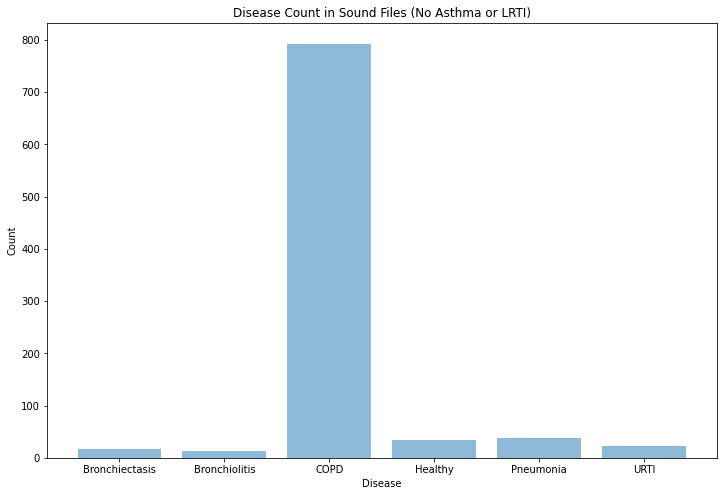

In [ ]:
unique_elements, counts_elements = np.unique(df_audio['diagnosis'], return_counts=True)

# plot class counts
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12,8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files (No Asthma or LRTI)')
plt.show()

In [ ]:
from tqdm import tqdm
# iterate through every audio file and extract features 
# using Mel-Frequency Cepstral Coefficients

labels = []
extracted_features=[]
preprocessed_data = []
for index_num,row in tqdm(df_audio.iterrows()):
    file_name = os.path.join(path,str(row["file name"]))
    final_class_labels=row["diagnosis"]
    data=preprocessing(file_name)
    extracted_features.append([data,final_class_labels])
    preprocessed_data.append(data)
    labels.append(row['diagnosis'])
preprocessed_data = np.array(preprocessed_data)
labels = np.array(labels)

917it [14:50,  1.03it/s]


In [ ]:
preprocessed_data.shape

(917, 20, 157)

In [ ]:
preprocessed_data = preprocessed_data.reshape((-1, 20, 157, 1))

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(labels))

In [ ]:
# extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','diagnosis'])
# extracted_features_df.head()

In [ ]:
# # Split the dataset into independent and dependent dataset
# # X=np.array(extracted_features_df['feature'].tolist())
# # y=np.array(extracted_features_df['diagnosis'].tolist())

# X=np.array(extracted_features_df['feature'])
# y=np.array(extracted_features_df['diagnosis'])

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(preprocessed_data,y,test_size=0.2,random_state=42)

In [ ]:
X_train.shape

(733, 20, 157, 1)

# CNN model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2,
                 input_shape=(20, 157, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))


model.add(GlobalAveragePooling2D())

model.add(Dense(6, activation='softmax')) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 19, 156, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 78, 16)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 9, 78, 16)         0         
                                                                 
 dense (Dense)               (None, 9, 78, 64)         1088      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 77, 32)         8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 38, 32)        0         
 2D)                                                    

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True
)

In [ ]:
# Training my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, 
                    validation_data=(X_test, y_test), callbacks=[checkpointer, early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
22/23 [===========================>..] - ETA: 0s - loss: 0.2308 - accuracy: 0.9077
Epoch 00001: val_loss improved from inf to 0.37731, saving model to saved_models/audio_classification.hdf5
23/23 [==============================] - 1s 38ms/step - loss: 0.2296 - accuracy: 0.9100 - val_loss: 0.3773 - val_accuracy: 0.8478
Epoch 2/200
22/23 [===========================>..] - ETA: 0s - loss: 0.2711 - accuracy: 0.9020
Epoch 00002: val_loss did not improve from 0.37731
23/23 [==============================] - 1s 22ms/step - loss: 0.2744 - accuracy: 0.9018 - val_loss: 0.4090 - val_accuracy: 0.8370
Epoch 3/200
22/23 [===========================>..] - ETA: 0s - loss: 0.2718 - accuracy: 0.9020
Epoch 00003: val_loss did not improve from 0.37731
23/23 [==============================] - 0s 21ms/step - loss: 0.2724 - accuracy: 0.9031 - val_loss: 0.4350 - val_accuracy: 0.8261
Epoch 4/200
23/23 [==============================] - ETA: 0s - loss: 0.2589 - accuracy: 0.9004
Epoch 00004: val_loss

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9208731055259705
Testing Accuracy:  0.8478260636329651


<Figure size 432x288 with 0 Axes>

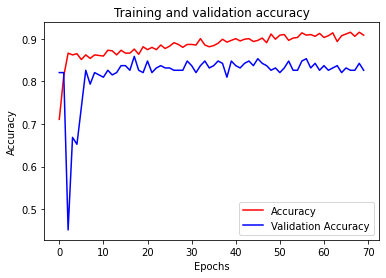

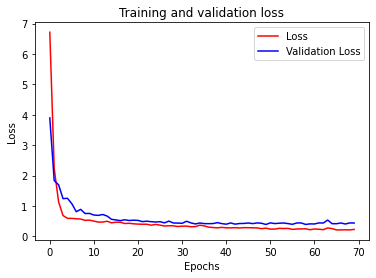

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])

plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])

plt.figure()

Minimum validation loss: 0.39339974522590637


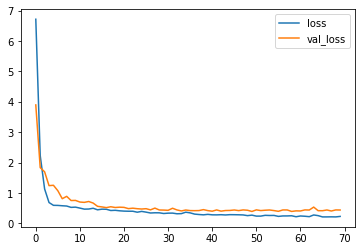

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print('Minimum validation loss: {}'.format(history_df['val_loss'].min()))

# Testing audio

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Capstone App/saved_models/audio_classification.hdf5')

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment

def convert_mp3_to_wav(path, output):
    sound = AudioSegment.from_mp3(path)
    sound.export(output, format="wav")

In [ ]:
filename = '/content/drive/MyDrive/Capstone App/AECNEAudioRecording.mp3'
output = '/content/drive/MyDrive/Capstone App/AECNEAudioRecording.wav'

convert_mp3_to_wav(filename,output)

In [ ]:
#filename = '/content/drive/MyDrive/Capstone App/Respiratory_Sound_Database/audio_and_txt_files/109_1b1_Pl_sc_Litt3200.wav'

mfccs = preprocessing(filename)
mfccs = mfccs.reshape((20, 157, 1))
mfccs = np.expand_dims(mfccs, axis=0)

In [ ]:
# Make prediction
predicted_label=model.predict(mfccs)
classpreds = np.argmax(predicted_label, axis=1) # predicted classes

prediction_class = labelencoder.inverse_transform(classpreds) 
prediction_class